<a href="https://colab.research.google.com/github/sohdacafe/Machine_Learning/blob/main/PCA_test_score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [97]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [43]:
filename = 'seiseki.csv'
df = pd.read_csv(filename)
df.head(3)

,kokugo,shakai,sugaku,rika,ongaku,bijutu,taiiku,gika,eigo
0,30,43,51,63,60,66,37,44,20
1,39,21,49,56,70,72,56,63,16
2,29,30,23,57,69,76,33,54,6


In [44]:
df['sum']=0
df['sum']=df.sum(axis=1)
df.head(3)

,kokugo,shakai,sugaku,rika,ongaku,bijutu,taiiku,gika,eigo,sum
0,30,43,51,63,60,66,37,44,20,414
1,39,21,49,56,70,72,56,63,16,442
2,29,30,23,57,69,76,33,54,6,377


In [45]:
df['ave']=0
df['ave'] = df.iloc[:,0:9].mean(axis=1)
df.head(3)

,kokugo,shakai,sugaku,rika,ongaku,bijutu,taiiku,gika,eigo,sum,ave
0,30,43,51,63,60,66,37,44,20,414,46.000000
1,39,21,49,56,70,72,56,63,16,442,49.111111
2,29,30,23,57,69,76,33,54,6,377,41.888889


In [46]:
df['std']=0
df['std'] = df.iloc[:,0:9].std(axis=1)
df.head(3)

,kokugo,shakai,sugaku,rika,ongaku,bijutu,taiiku,gika,eigo,sum,ave,std
0,30,43,51,63,60,66,37,44,20,414,46.000000,15.556349
1,39,21,49,56,70,72,56,63,16,442,49.111111,20.114947
2,29,30,23,57,69,76,33,54,6,377,41.888889,23.197222


In [54]:
df[df['ave']>85]

,kokugo,shakai,sugaku,rika,ongaku,bijutu,taiiku,gika,eigo,sum,ave,std
3,95,87,77,100,77,82,78,96,87,779,86.555556,8.790778
38,84,90,87,100,93,75,54,100,90,773,85.888889,14.242932
155,91,69,100,83,96,74,91,74,91,769,85.444444,10.921437


In [57]:
df[['sugaku','rika']].head(3)

,sugaku,rika
0,51,63
1,49,56
2,23,57


In [62]:
df.describe()

,kokugo,shakai,sugaku,rika,ongaku,bijutu,taiiku,gika,eigo,sum,ave,std
count,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000
mean,52.331325,39.602410,45.614458,49.885542,42.331325,62.457831,57.740964,47.307229,39.084337,436.355422,48.483936,16.499346
std,21.835858,21.456335,24.236127,21.408130,22.894855,17.188298,26.577943,22.519397,29.507351,165.504811,18.389423,4.577944
min,0.000000,4.000000,0.000000,9.000000,2.000000,15.000000,2.000000,2.000000,0.000000,87.000000,9.666667,5.174725
25%,35.000000,23.000000,28.000000,31.000000,25.250000,52.000000,35.250000,31.250000,12.000000,308.250000,34.250000,13.158689
50%,53.000000,35.000000,43.000000,49.000000,41.500000,65.000000,60.000000,48.500000,35.000000,439.000000,48.777778,16.689142
75%,70.000000,53.750000,63.750000,65.750000,58.750000,75.750000,82.000000,65.000000,66.750000,561.000000,62.333333,19.377822
max,96.000000,90.000000,100.000000,100.000000,96.000000,99.000000,99.000000,100.000000,99.000000,779.000000,86.555556,28.672480


In [65]:
pd.options.display.precision = 2

In [66]:
df.describe()

,kokugo,shakai,sugaku,rika,ongaku,bijutu,taiiku,gika,eigo,sum,ave,std
count,166.00,166.00,166.00,166.00,166.00,166.00,166.00,166.00,166.00,166.00,166.00,166.00
mean,52.33,39.60,45.61,49.89,42.33,62.46,57.74,47.31,39.08,436.36,48.48,16.50
std,21.84,21.46,24.24,21.41,22.89,17.19,26.58,22.52,29.51,165.50,18.39,4.58
min,0.00,4.00,0.00,9.00,2.00,15.00,2.00,2.00,0.00,87.00,9.67,5.17
25%,35.00,23.00,28.00,31.00,25.25,52.00,35.25,31.25,12.00,308.25,34.25,13.16
50%,53.00,35.00,43.00,49.00,41.50,65.00,60.00,48.50,35.00,439.00,48.78,16.69
75%,70.00,53.75,63.75,65.75,58.75,75.75,82.00,65.00,66.75,561.00,62.33,19.38
max,96.00,90.00,100.00,100.00,96.00,99.00,99.00,100.00,99.00,779.00,86.56,28.67


In [69]:
df_corr=df.iloc[:,0:9].corr()
df_corr

,kokugo,shakai,sugaku,rika,ongaku,bijutu,taiiku,gika,eigo
kokugo,1.00,0.78,0.72,0.72,0.71,0.68,0.41,0.67,0.76
shakai,0.78,1.00,0.78,0.83,0.75,0.61,0.19,0.68,0.79
sugaku,0.72,0.78,1.00,0.82,0.75,0.58,0.15,0.58,0.80
rika,0.72,0.83,0.82,1.00,0.79,0.59,0.10,0.73,0.75
ongaku,0.71,0.75,0.75,0.79,1.00,0.65,0.30,0.59,0.70
bijutu,0.68,0.61,0.58,0.59,0.65,1.00,0.43,0.54,0.57
taiiku,0.41,0.19,0.15,0.10,0.30,0.43,1.00,0.15,0.28
gika,0.67,0.68,0.58,0.73,0.59,0.54,0.15,1.00,0.61
eigo,0.76,0.79,0.80,0.75,0.70,0.57,0.28,0.61,1.00


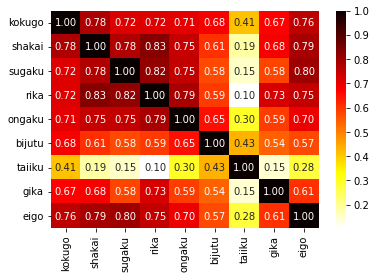

In [79]:
sns.heatmap(df_corr, cmap='hot_r', annot=True, fmt='.2f')

In [138]:
# 主成分分析実行
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
feature = pca.fit(df)

In [139]:
# データを主成分空間に写像
feature = pca.transform(df)

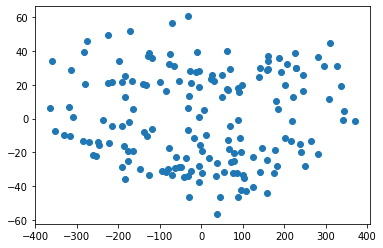

In [140]:
x = feature[:,0]
y = feature[:,1]
plt.scatter(x,y)
plt.show()

Text(0, 0.5, 'PC2')

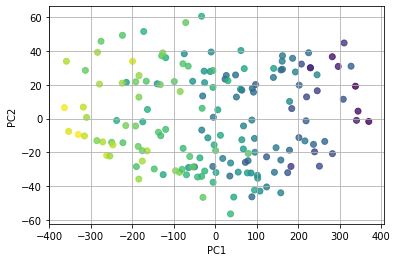

In [141]:
#第2主成分まででプロット
plt.scatter(feature[:, 0], feature[:, 1], alpha=0.8, c=list(df.iloc[:, 0]))
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")

In [142]:
#寄与率表示(各成分の寄与度を百分率で表示、TTLが1になる)
pca.explained_variance_ratio_

array([0.94735983, 0.02231132, 0.00843234, 0.00650108, 0.00387181,
       0.00335346])